In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. What is the shape of "movies.csv"?


In [2]:
df_movies = pd.read_csv(r"C:\Users\Utteja\Desktop\D_S INTERNSHIP\movies.csv")

df_movies.shape

(9742, 3)

# 3. What is the shape of "ratings.csv"?


In [3]:
df_rating = pd.read_csv(r"C:\Users\Utteja\Desktop\D_S INTERNSHIP\ratings.csv")

df_rating.shape

(100836, 4)

# 4. How many unique "userId" are available in "ratings.csv"?


In [4]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_rating["userId"].nunique()

610

# 5. Which movie has recieved maximum number of user ratings?

In [6]:
dfm = pd.merge(df_movies, df_rating, on = "movieId")

df_f = dfm.groupby("title")["rating"].count().sort_values(ascending=False).reset_index()
df_f

,title,rating
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
...,...,...
9714,King Solomon's Mines (1950),1
9715,King Solomon's Mines (1937),1
9716,King Ralph (1991),1
9717,King Kong Lives (1986),1


# 6. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [7]:
df_tags = pd.read_csv(r"C:\Users\Utteja\Desktop\D_S INTERNSHIP\tags.csv")

In [8]:
df_mac = df_movies[df_movies["title"] == "Matrix, The (1999)"]["movieId"].values[0]

df_match = df_tags[df_tags["movieId"] == df_mac]
df_match["tag"].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

# 7. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [9]:
df_merge = pd.merge(df_rating, df_movies, on = "movieId")
df_merge.head()

dff = df_merge.groupby(df_merge["title"] == "Terminator 2: Judgment Day (1991)")["rating"].mean()
dff

title
False    3.500512
True     3.970982
Name: rating, dtype: float64

# 8. How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

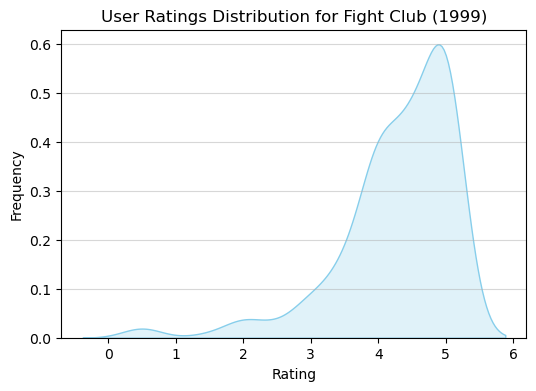

In [10]:
merged_data = pd.merge(df_rating, df_movies, on = 'movieId')
fight_club_data = merged_data[merged_data['title'] == "Fight Club (1999)"]


plt.figure(figsize=(6,4))
sns.kdeplot(fight_club_data['rating'], shade=True, color='skyblue')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

## Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [11]:
ratings_grouped = df_rating.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Renaming columns
ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']

merged_data = pd.merge(df_movies, ratings_grouped, on='movieId', how='inner')

movies50_ratings = merged_data[merged_data['rating_count'] > 50]

movies50_ratings.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


# 9. Which movie is the most popular based on  average user ratings?


In [12]:
movies50_ratings.sort_values(by = "rating_mean", ascending = False).reset_index().iloc[0]

index                                        277
movieId                                      318
title           Shawshank Redemption, The (1994)
genres                               Crime|Drama
rating_count                                 317
rating_mean                             4.429022
Name: 0, dtype: object

# 10. Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [13]:
movies50_ratings.sort_values(by = "rating_count", ascending = False)["title"].reset_index().iloc[0:5]

,index,title
0,314,Forrest Gump (1994)
1,277,"Shawshank Redemption, The (1994)"
2,257,Pulp Fiction (1994)
3,510,"Silence of the Lambs, The (1991)"
4,1938,"Matrix, The (1999)"


# 11. Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [19]:
movies50_ratings[movies50_ratings['genres'].apply(lambda x: 'Sci-Fi' in x.split('|'))].sort_values(by='rating_count',ascending=False).iloc[2]

movieId                                      480
title                       Jurassic Park (1993)
genres          Action|Adventure|Sci-Fi|Thriller
rating_count                                 238
rating_mean                                 3.75
Name: 418, dtype: object

In [20]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [16]:
links_df = pd.read_csv(r"C:\Users\Utteja\Desktop\D_S INTERNSHIP\links.csv")

In [22]:
# Assuming 'filtered_movies' DataFrame contains movies with more than 50 user ratings
# Assuming 'links_df' DataFrame contains movieId, imdbId, tmdbId

movies_with_imdb_ids = pd.merge(movies50_ratings, links_df, on='movieId', how='inner')

all_reviews = []

# Function to scrape IMDB reviews for a movie given its IMDB ID
def scrapper(imdb_id):
    id_str = str(int(imdb_id))
    n_zeroes = 7 - len(id_str)
    new_id = "0" * n_zeroes + id_str
    URL = f"https://www.imdb.com/title/tt{new_id}/reviews"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all review containers
    review_containers = soup.find_all('div', class_='text show-more__control')  # Update this class to the actual review container class
    
    reviews = [container.text.strip() for container in review_containers]
    return reviews



for index, row in movies_with_imdb_ids.iterrows():
    imdb_id = row['imdbId']
    movie_reviews = scrapper(imdb_id)
    all_reviews.extend([(imdb_id, review) for review in movie_reviews])

# Create a DataFrame from the collected reviews
reviews_df = pd.DataFrame(all_reviews, columns=['imdbId', 'Review_Text'])


# Create a DataFrame from the collected reviews
# reviews_df = pd.DataFrame({'IMDB_Reviews': all_reviews})

In [23]:
reviews_df.head()

,imdbId,Review_Text
0,114709,Andy's toys live a reasonable life of fun and ...
1,114709,This is a very clever animated story that was ...
2,114709,I am a big fan of the animated movies coming f...
3,114709,Toy Story – 5/5 starsChildren play with toys. ...
4,114709,Toy Story is a sheer delight to view on the sc...


In [24]:
reviews_df.to_csv("scrapped_data.csv", index = False)

In [25]:
df = pd.read_csv(r"C:\Users\Utteja\Desktop\D_S INTERNSHIP\scrapped_data.csv")

In [26]:
df.head()

,imdbId,Review_Text
0,114709,Andy's toys live a reasonable life of fun and ...
1,114709,This is a very clever animated story that was ...
2,114709,I am a big fan of the animated movies coming f...
3,114709,Toy Story – 5/5 starsChildren play with toys. ...
4,114709,Toy Story is a sheer delight to view on the sc...


# 12. Mention the movieId of the movie which has the highest IMDB rating.


In [28]:
merged_reviews_links = pd.merge(reviews_df, links_df, on='imdbId', how='inner')

merged_reviews_links_ratings = pd.merge(merged_reviews_links,movies50_ratings, on = 'movieId', how = 'inner')

In [29]:
merged_reviews_links_ratings.columns

Index(['imdbId', 'Review_Text', 'movieId', 'tmdbId', 'title', 'genres',
       'rating_count', 'rating_mean'],
      dtype='object')

In [31]:
# Find the movie with the highest IMDB rating
highest_rated_movie = merged_reviews_links_ratings.loc[merged_reviews_links_ratings['rating_count'].idxmax()]

# Extract the movieId with the highest IMDB rating
highest_rated_movie_id = highest_rated_movie['movieId']

print(highest_rated_movie_id)

356


# 13. Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [32]:
merged_reviews_links_ratings[merged_reviews_links_ratings['genres'].apply(lambda x: 'Sci-Fi' in x.split('|'))].sort_values(by='rating_count',ascending=False).iloc[0]

imdbId                                                     133093
Review_Text     Truly a masterpiece in every way! If it wasn't...
movieId                                                      2571
tmdbId                                                      603.0
title                                          Matrix, The (1999)
genres                                     Action|Sci-Fi|Thriller
rating_count                                                  278
rating_mean                                              4.192446
Name: 6203, dtype: object